In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy import constants as cst
import matplotlib
matplotlib.rcParams['font.size'] = 20

In [2]:
def hmm_gauss(freq,tau,m=0):
    return (2.0*np.pi*freq*tau/4)**(2*m) * np.exp(-(2.0*np.pi*freq*tau/4.)**2)

In [3]:
N = 3.5E10
Qx = 26.18
Qs = 0.0051
gamma_t = 22.8
energy = 270.0
gamma = np.sqrt(1+(energy/0.938)**2)
circum = 2*np.pi*1.1E3
frev = cst.c/circum
eta = 1/gamma_t**2 - 1/gamma**2
tau = 1.85E-9
sigmaz = tau*cst.c/4
modeNumber = 0
chroma=0.0

In [9]:
#### Impedance model from https://gitlab.cern.ch/IRIS/SPS_IW_model/-/tree/master/SPS_IW_model_python ###########################################
path2impedanceModel='/home/natalia/PhD_projects/headtail_instabilities_and_impedance/from_Xavier'
impedanceData = np.genfromtxt(f'{path2impedanceModel}/SPS_Complete_imp_model_2018_Q26.txt',skip_header=1,dtype=complex)
freqZ = np.real(impedanceData[:,0])*1E9 # original 1e6
ReZ = np.real(impedanceData[:,2]) # keep the real part of the impedance, in order to compute the imaginary part of the tune shift

In [14]:
# Comput effective impedance
nSideband = int(np.floor((1E10/frev)))
sidebands = np.arange(-nSideband,nSideband+0.5)
print(sidebands)

chromaShift = chroma*frev/eta

freqs = frev*(-0.18+sidebands+modeNumber*Qs) # spectrum of gaussian bunch oscillation in mode modeNumebr

hs = hmm_gauss(freqs-chromaShift,tau,m=modeNumber)

zeffs = np.interp(np.abs(freqs),freqZ,ReZ)*np.sign(freqs)*hs # np.sign(freqs) as the ReZ is always an odd function of the frequency
#zeffs = np.interp(np.abs(freqs),freqZ,ReZ)*hs # np.sign(freqs) as the ReZ is always an odd function of the frequency
zeffs /= np.sum(hs)
zeff = np.sum(zeffs)
print(zeff)

[-230542. -230541. -230540. ...  230540.  230541.  230542.]
-24814.93158353845


(-5000000000.0, 5000000000.0)

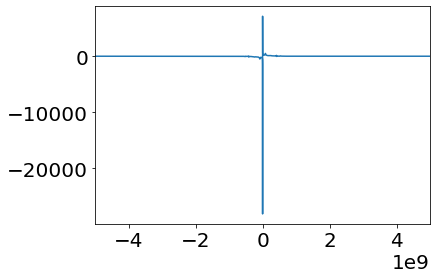

In [15]:
plt.plot(freqs, zeffs)
plt.xlim(-0.5e10,0.5e10)

In [16]:
dampingRate = zeff*cst.e**2*N/(16.0*np.pi*cst.m_p*gamma*Qx*frev*sigmaz*2*np.pi)

In [17]:
dampingRate

-9.311949812524053e-07

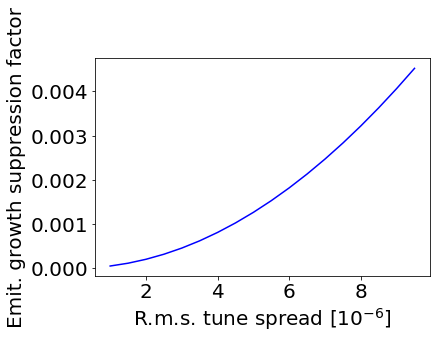

In [86]:





    #### Sacherer formula (e.g. 8 and 9 in Sec 2.5.7 in Handbook of Accelerator physics and engineering from A. Chao and M. Tigner) ################
   
    #dampingRate = zeff*cst.e**2*N/(16.0*np.pi*cst.m_p*gamma*Qx*frev*sigmaz)
    #### Eq. 26 in https://aip.scitation.org/doi/abs/10.1063/1.47298 #################################################################################
    dGain = 2*dampingRate
    dmu = np.arange(1E-6,1E-5,5E-7)
    supps = np.zeros_like(dmu)
    for i in range(len(dmu)):
        f = lambda x : (4*np.pi**2*(1-dGain/2)**2*x**2)*np.exp(-x**2/(2.0*dmu[i]**2))/((4*np.pi**2*(1-dGain/2)*x**2+(dGain/2)**2)*np.sqrt(2*np.pi)*dmu[i])
        integral = quad(f,-10*dmu[i],10*dmu[i])
        supps[i] = integral[0]
    ##################################################################################################################################################

    fig = plt.figure(1)
    plt.plot(dmu*1E6,supps,'-b')
    plt.xlabel(r'R.m.s. tune spread [$10^{-6}$]')
    plt.ylabel(r'Emit. growth suppression factor')

    plt.show()
